In [1]:
# This model is inspired by Kassem
#Student at Faculty of Engineering, Port Said University
#Port Fuad, Port Said Governorate, Egypt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data=pd.read_csv(r"C:\Users\Rajesh\Desktop\Machine_learning\kaggle_cmp1\titanic\train.csv")
test_data=pd.read_csv(r"C:\Users\Rajesh\Desktop\Machine_learning\kaggle_cmp1\titanic\test.csv")


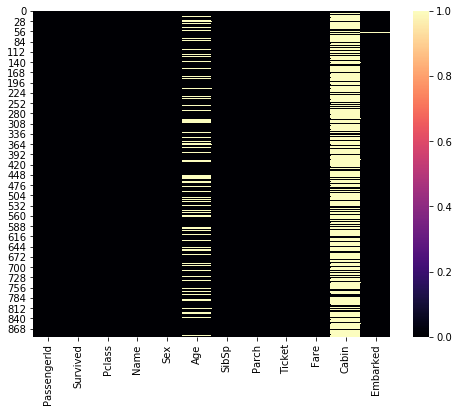

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(train_data.isnull() , cmap='magma')


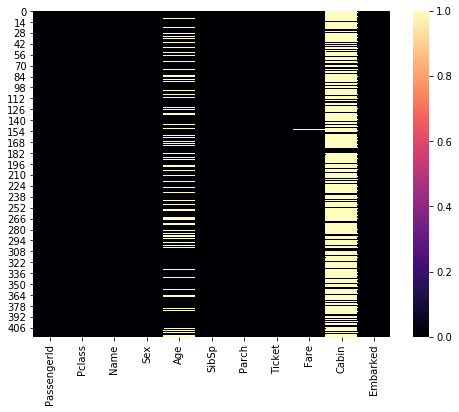

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(test_data.isnull() , cmap='magma')


In [6]:
all_data=pd.concat([train_data , test_data] , sort=True).reset_index(drop=True)

In [7]:
pd.isnull(all_data).sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

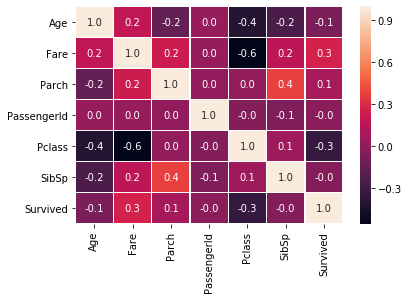

In [8]:
sns.heatmap(all_data.corr() , annot=True , fmt='.1f' , linewidth='0.5')

In [9]:
age_by_pclass_sex = all_data.groupby(['Sex', 'Pclass']).median()['Age']
all_data['Age'] = all_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [10]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')
med_fare = all_data.groupby(['Pclass', 'Parch', 'SibSp']).median()['Fare'][3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
all_data['Fare'] = all_data['Fare'].fillna(med_fare)

In [11]:
all_data['Deck'] = all_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_all_decks = all_data.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()
print(df_all_decks)

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1


Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T'], dtype='object', name='Deck')


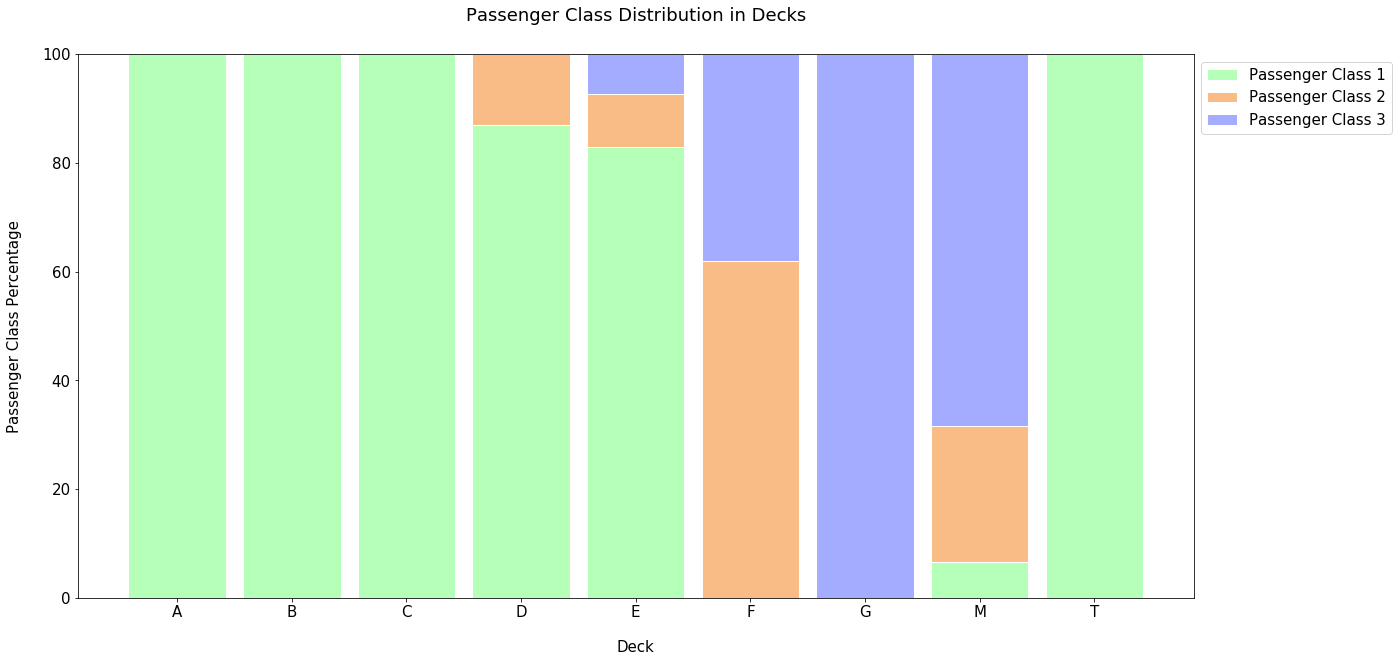

In [12]:
def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    print(decks)
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages
def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    

    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')


    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

In [13]:
idx =all_data[all_data['Deck'] == 'T'].index
all_data.loc[idx, 'Deck'] = 'A'

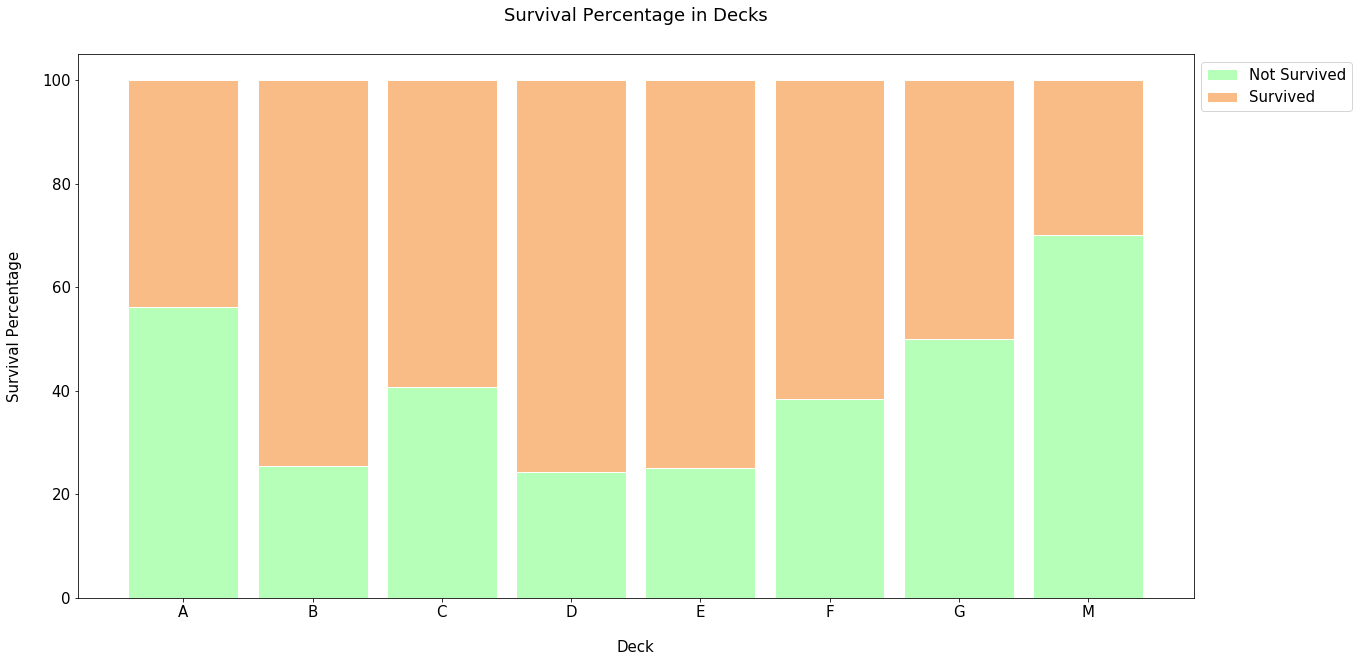

In [14]:
df_all_decks_survived = all_data.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

In [15]:

all_data['Deck'] = all_data['Deck'].replace(['D', 'E'], 'DE')
all_data['Deck'] = all_data['Deck'].replace(['F', 'G'], 'FG')

all_data['Deck'].value_counts()

M     1014
C       94
DE      87
B       65
FG      26
A       23
Name: Deck, dtype: int64

In [16]:
all_data.drop(['Cabin' , 'Name' , 'Ticket' , 'PassengerId'], inplace=True, axis=1)

In [17]:
train_data , test_data=all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)


C:\Users\Rajesh\Anaconda3.x\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


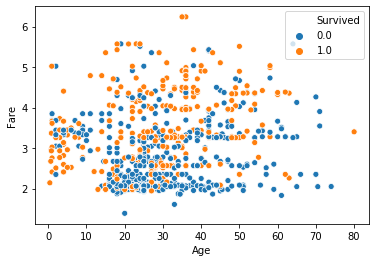

In [18]:
sns.scatterplot(x='Age' , y=np.log(train_data["Fare"]) , hue='Survived' , data=train_data)

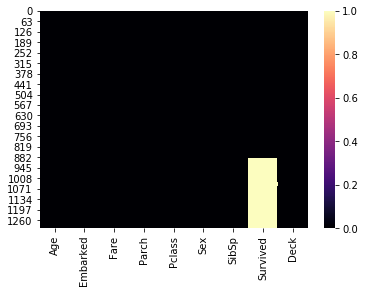

In [19]:
sns.heatmap(all_data.isnull() , cmap='magma')

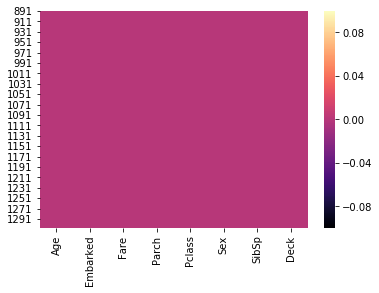

In [20]:
sns.heatmap(test_data.isnull() , cmap='magma')

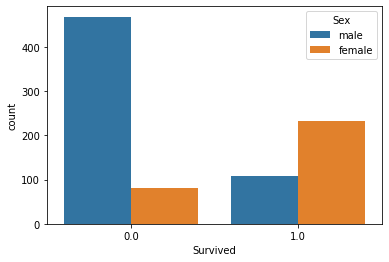

In [21]:
sns.countplot(x='Survived' , hue="Sex" , data=train_data)

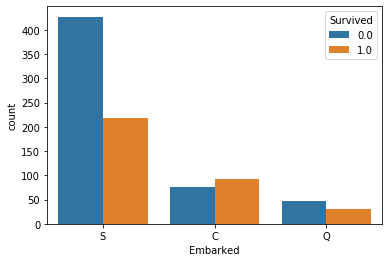

In [22]:
sns.countplot(x="Embarked" , hue='Survived' , data=train_data)

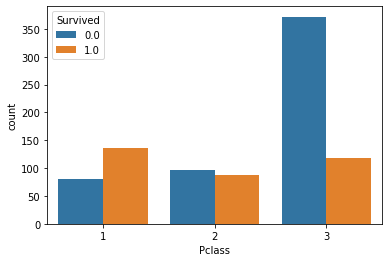

In [23]:
sns.countplot(x="Pclass" , hue='Survived' , data=train_data)

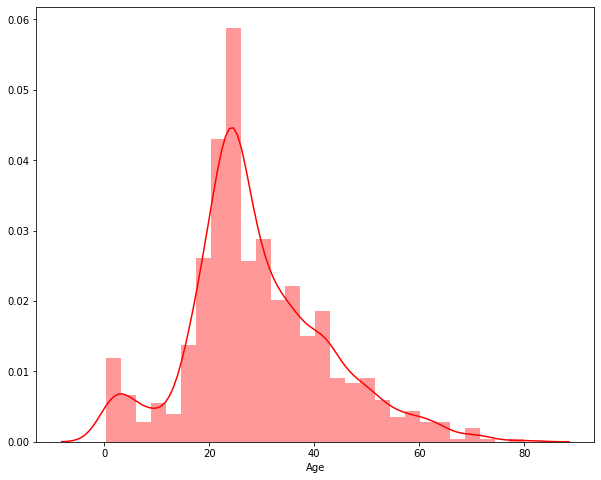

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(train_data["Age"] , color='red')

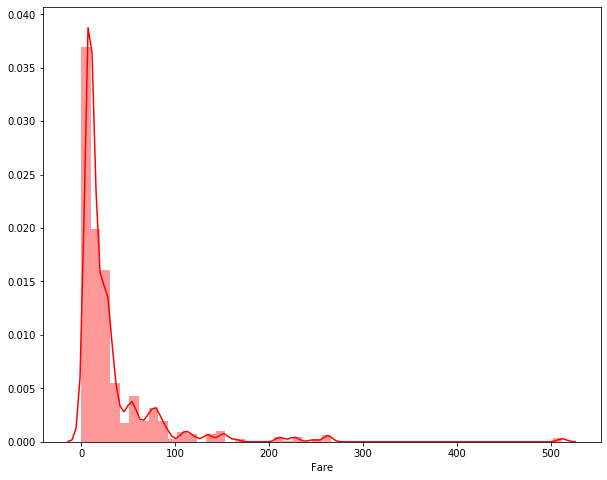

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(train_data["Fare"] , color='red')

In [26]:
def show_fare_distribution():
    plt.figure(figsize=(20,5))
    sns.kdeplot(train_data[train_data.Survived==0].Fare, color="Blue", shade=True)
    sns.kdeplot(train_data[train_data.Survived==1].Fare, color="Green", shade=True)
    plt.axvline(np.max(train_data.Fare.values), color="Yellow")
    plt.axvline(np.min(train_data.Fare.values), color="Yellow")
    plt.axvline(np.mean(train_data.Fare.values)+np.std(train_data.Fare.values), color="Orange")
    plt.axvline(np.mean(train_data.Fare.values)-np.std(train_data.Fare.values), color="Orange")
    plt.axvline(np.mean(train_data.Fare.values), color="Red")
    plt.axvline(np.median(train_data.Fare.values), color="Black")
    plt.xlabel("Fare")
    plt.ylabel("Density")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Rajesh\\Anaconda3.x\\lib\\site-packages\\matplotlib\\pyplot.py'>

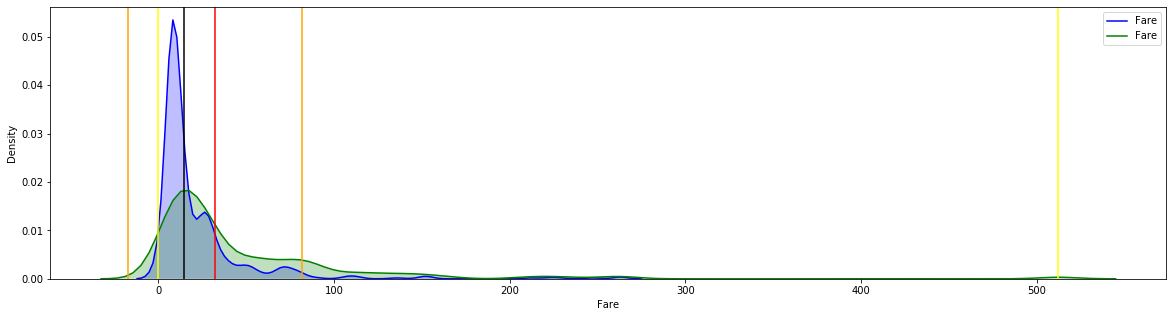

In [27]:
show_fare_distribution()

In [28]:
train_data.Fare = train_data.Fare.apply(lambda l: np.log(l+1))

C:\Users\Rajesh\Anaconda3.x\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<module 'matplotlib.pyplot' from 'C:\\Users\\Rajesh\\Anaconda3.x\\lib\\site-packages\\matplotlib\\pyplot.py'>

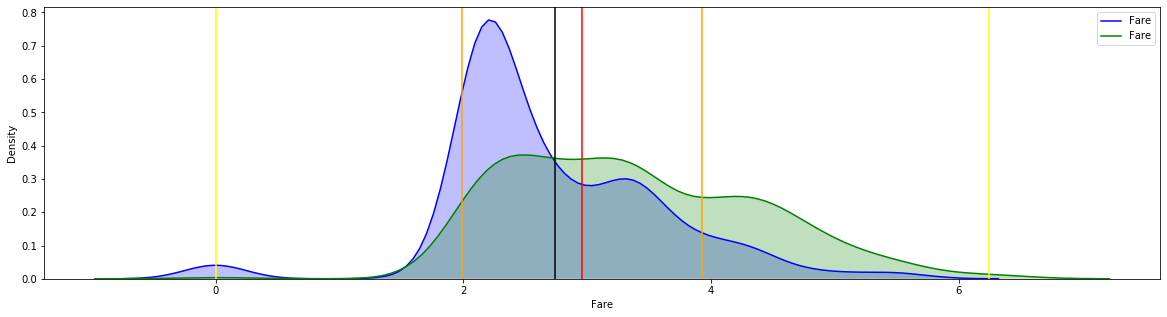

In [29]:
show_fare_distribution()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data.Fare = scaler.fit_transform(train_data.Fare.values.reshape(-1,1))


C:\Users\Rajesh\Anaconda3.x\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


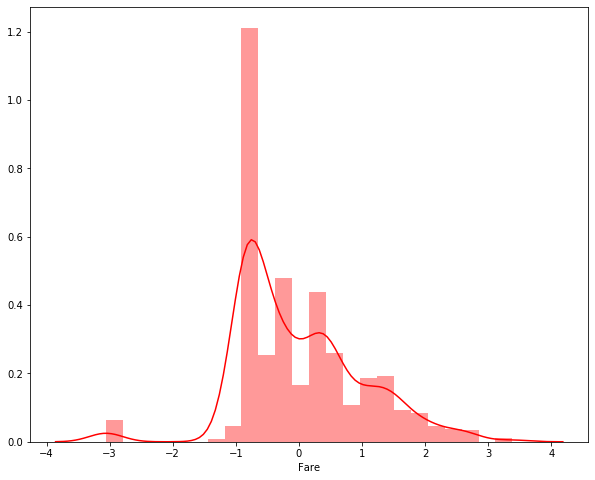

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(train_data["Fare"] , color='red')

In [32]:
assert(np.round(np.mean(train_data.Fare), 2) == 0.)
assert(np.round(np.median(train_data.Fare), 2) == -0.23)
assert(np.round(np.min(train_data.Fare), 2) == -3.06)
assert(np.round(np.max(train_data.Fare), 2) == 3.39)
assert(np.round(np.std(train_data.Fare), 2) == 1.)

In [33]:
cols=train_data.select_dtypes('object').columns
cols

Index(['Embarked', 'Sex', 'Deck'], dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data[cols] = train_data[cols].apply(le.fit_transform)
test_data[cols] = test_data[cols].apply(le.fit_transform)
train_data[cols].head()

C:\Users\Rajesh\Anaconda3.x\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Embarked,Sex,Deck
0,2,1,5
1,0,0,2
2,2,0,5
3,2,0,2
4,2,1,5


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

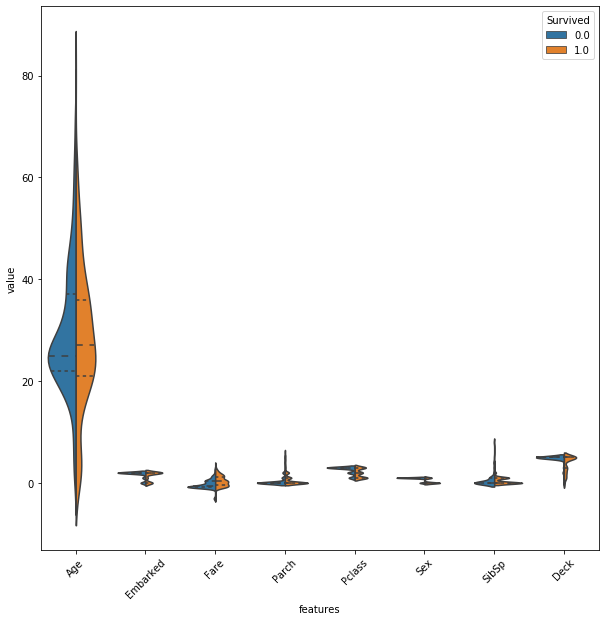

In [35]:
data=pd.melt(train_data , id_vars='Survived' , var_name='features' , value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features' , y='value' , hue='Survived' , data=data , split=True , inner='quart')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

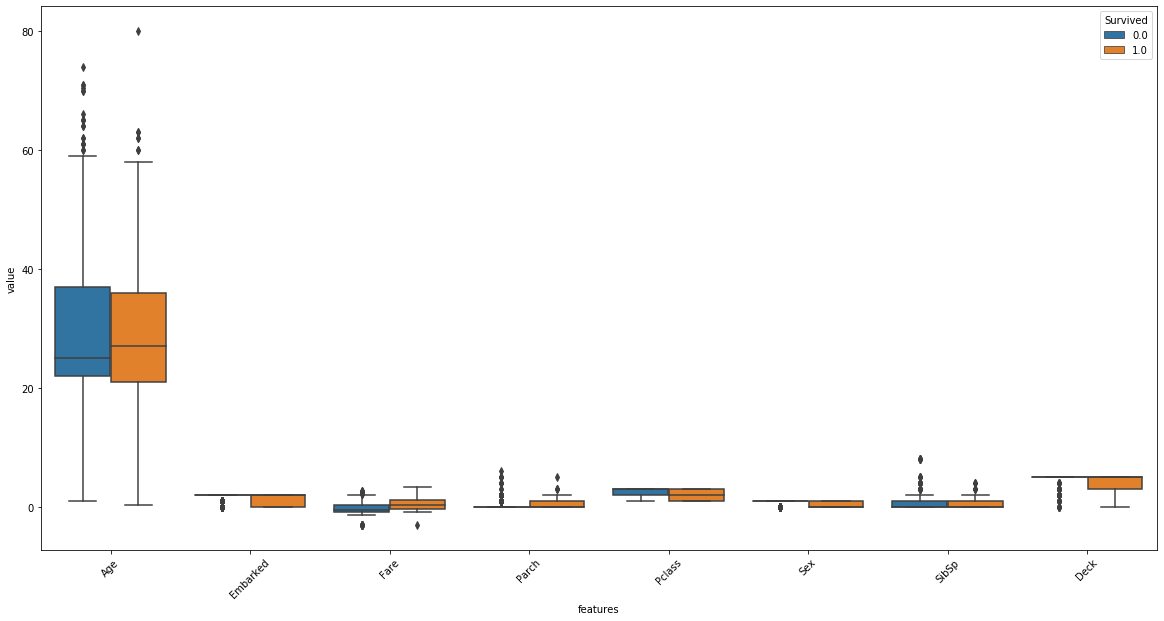

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(x='features' , y='value' , hue='Survived' , data=data)
plt.xticks(rotation=45)

In [37]:
train_data.describe()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Deck
count,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.188182,1.536476,-1.903951e-16,0.381594,2.308642,0.647587,0.523008,0.383838,4.335578
std,13.337887,0.791503,1.000562e+00,0.806057,0.836071,0.477990,1.102743,0.486592,1.326761
min,0.420000,0.000000,-3.058578e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,-8.002318e-01,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000
50%,26.000000,2.000000,-2.316613e-01,0.000000,3.000000,1.000000,0.000000,0.000000,5.000000
75%,36.000000,2.000000,5.198636e-01,0.000000,3.000000,1.000000,1.000000,1.000000,5.000000
max,80.000000,2.000000,3.385294e+00,6.000000,3.000000,1.000000,8.000000,1.000000,5.000000


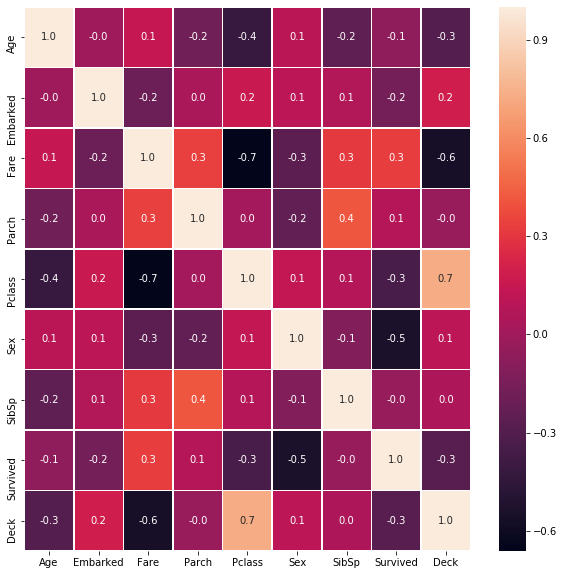

In [38]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr() , annot=True , fmt='0.1f' , linewidth='0.5', ax=ax)

In [39]:
train_data.describe()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Deck
count,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.188182,1.536476,-1.903951e-16,0.381594,2.308642,0.647587,0.523008,0.383838,4.335578
std,13.337887,0.791503,1.000562e+00,0.806057,0.836071,0.477990,1.102743,0.486592,1.326761
min,0.420000,0.000000,-3.058578e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,-8.002318e-01,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000
50%,26.000000,2.000000,-2.316613e-01,0.000000,3.000000,1.000000,0.000000,0.000000,5.000000
75%,36.000000,2.000000,5.198636e-01,0.000000,3.000000,1.000000,1.000000,1.000000,5.000000
max,80.000000,2.000000,3.385294e+00,6.000000,3.000000,1.000000,8.000000,1.000000,5.000000


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=train_data.drop(['Survived'] , axis=1 )
Y=train_data.Survived

In [41]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.3 , random_state=42)

In [42]:
cols=['Fare' , 'Age']
sc=StandardScaler()
x_train[cols]=sc.fit_transform(x_train[cols])
x_test[cols]=sc.transform(x_test[cols])

C:\Users\Rajesh\Anaconda3.x\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rajesh\Anaconda3.x\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Rajesh\Anaconda3.x\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [43]:
class Model:
    def __init__(self, model):
        self.model = model
        self.X, self.y = X, Y
        self.X_train, self.X_test, self.y_train, self.y_test = x_train, x_test, y_train, y_test
        
        self.train()
    
    def model_name(self):
        model_name = type(self.model).__name__
        return model_name
        
    def cross_validation(self, cv=5):
        print(f"Evaluate {self.model_name()} score by cross-validation...")
        CVS = cross_val_score(self.model, self.X, self.y, scoring='accuracy', cv=cv)
        print(CVS)
        print("="*60, "\nMean accuracy of cross-validation: ", CVS.mean())
    
    def train(self):
        print(f"Training {self.model_name()} Model...")
        self.model.fit(self.X_train, self.y_train)
        print("Model Trained.")
        
    def prediction(self, test_x=None, test=False):
        if test == False:
            y_pred = self.model.predict(self.X_test)
        else:
            y_pred = self.model.predict(test_x)
            
        return y_pred
    
    def accuracy(self):
        y_pred = self.prediction()
        y_test = self.y_test
        
        acc = accuracy_score(y_pred, y_test)
        print(f"{self.model_name()} Model Accuracy: ", acc)
    def f1_score(self):
        y_pred = self.prediction()
        y_test = self.y_test
        
        acc = f1_score(y_pred, y_test)
        print(f"{self.model_name()} Model f1_score: ", acc)
    def confusion(self):
        cm=confusion_matrix(self.y_test , self.prediction())
        sns.heatmap(cm , annot=True , fmt='d')

In [44]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , f1_score , confusion_matrix

In [45]:
xgb = XGBClassifier()
xgb = Model(xgb)

Training XGBClassifier Model...
Model Trained.


In [46]:
xgb.cross_validation()

Evaluate XGBClassifier score by cross-validation...
[0.79888268 0.81460674 0.84831461 0.79213483 0.85393258]
Mean accuracy of cross-validation:  0.8215742891218379


In [47]:
xgb.accuracy()

XGBClassifier Model Accuracy:  0.8171641791044776


In [48]:
xgb.f1_score()

XGBClassifier Model f1_score:  0.7609756097560975


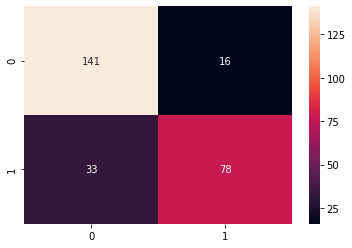

In [49]:
xgb.confusion()

In [50]:
Knn=KNeighborsClassifier()
knn=Model(Knn)

Training KNeighborsClassifier Model...
Model Trained.


In [51]:
knn.cross_validation()

Evaluate KNeighborsClassifier score by cross-validation...
[0.7877095  0.75842697 0.74719101 0.79775281 0.79213483]
Mean accuracy of cross-validation:  0.7766430230368464


In [52]:
knn.accuracy()

KNeighborsClassifier Model Accuracy:  0.7723880597014925


In [53]:
knn.f1_score()

KNeighborsClassifier Model f1_score:  0.7136150234741784


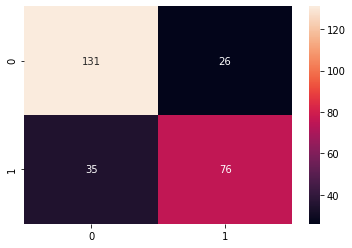

In [54]:
knn.confusion()

In [55]:
svc=SVC()
svc=Model(svc)

Training SVC Model...
Model Trained.


In [56]:
svc.cross_validation()

Evaluate SVC score by cross-validation...
[0.66480447 0.70786517 0.69101124 0.74719101 0.7247191 ]
Mean accuracy of cross-validation:  0.7071181972255351


In [57]:
svc.accuracy()

SVC Model Accuracy:  0.8097014925373134


In [58]:


svc.f1_score()

SVC Model f1_score:  0.7605633802816901


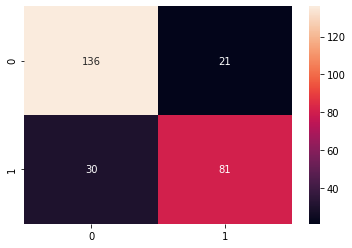

In [59]:
svc.confusion()

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = Model(rfc)
rfc.cross_validation()
rfc.accuracy()

Training RandomForestClassifier Model...
Model Trained.
Evaluate RandomForestClassifier score by cross-validation...
[0.77653631 0.80337079 0.84831461 0.75280899 0.84831461]
Mean accuracy of cross-validation:  0.8058690603226413
RandomForestClassifier Model Accuracy:  0.7835820895522388


In [61]:
rfc.f1_score()

RandomForestClassifier Model f1_score:  0.7314814814814815


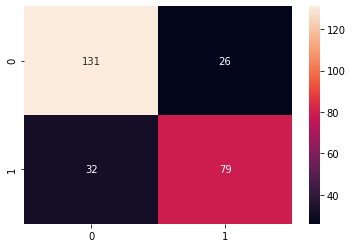

In [62]:
rfc.confusion()

In [63]:
test_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Deck
891,34.5,1,7.8292,0,3,1,0,5
892,47.0,2,7.0000,0,3,0,1,5
893,62.0,1,9.6875,0,2,1,0,5
894,27.0,2,8.6625,0,3,1,0,5
895,22.0,2,12.2875,1,3,0,1,5


In [64]:
test_data[cols]=sc.transform(test_data[cols])

In [65]:
xgb_pred = xgb.prediction(test_x=test_data, test=True)
svc_pred = svc.prediction(test_x=test_data, test=True)
rfc_pred = rfc.prediction(test_x=test_data, test=True)
knn_pred = knn.prediction(test_x=test_data, test=True)

In [66]:
test_data1=pd.read_csv(r"C:\Users\Rajesh\Desktop\Machine_learning\kaggle_cmp1\titanic\test.csv")

In [67]:
sub=pd.DataFrame(test_data1.PassengerId)

In [68]:
sub.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [69]:
sub['Survived']=xgb_pred
sub.head(10)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
5,897,0.0
6,898,0.0
7,899,0.0
8,900,0.0
9,901,0.0


In [70]:
sub.to_csv('xgb1_submission.csv' , index=False)

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb=Model(gnb)
gnb.cross_validation()
gnb.accuracy()

Training GaussianNB Model...
Model Trained.
Evaluate GaussianNB score by cross-validation...
[0.73743017 0.74719101 0.76966292 0.79775281 0.79775281]
Mean accuracy of cross-validation:  0.7699579436319126
GaussianNB Model Accuracy:  0.7947761194029851
